<a href="https://colab.research.google.com/github/diegalvez/Telecom-X-Final/blob/main/TelecomXFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 Preparação dos dados**

## 1.1 Extração do arquivo tratado

In [3]:
#Importando a biblioteca Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = '/content/dados_normalizados.csv'#importando e atribuindo o arquivo csv à variavel url
df = pd.read_csv(url)#Lendo o arquivo com a biblioteca pandas e atribuindo à variável df
df.head()#Exibindo as 5 primeiras linhas do dataframe

,cliente_id,evasao,cliente_genero,cliente_mais_65,cliente_parceiro,cliente_dependentes,meses_contrato,assinatura_servico_telefonico,multiplas_linhas_telefonicas,servico_internet,...,protecao_dispositivo,suporte_tecnico_internet,internet_tv_streaming,streaming_filmes,tipo_contrato,fatura_online,metodo_pagamento,conta_mensal,valor_total_contas,contas_diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,Sim,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0.0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,Não,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Sim,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1.0,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Sim,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Sim,Mailed check,83.9,267.40,2.80


## 1.2 Remoção de colunas irrelevantes

In [5]:
df = df.drop(columns=['cliente_id'])#Excluindo a coluna cliente_id
df.head()#Exibindo as 5 primeiras linhas do dataframe

,evasao,cliente_genero,cliente_mais_65,cliente_parceiro,cliente_dependentes,meses_contrato,assinatura_servico_telefonico,multiplas_linhas_telefonicas,servico_internet,servico_seguranca_online,...,protecao_dispositivo,suporte_tecnico_internet,internet_tv_streaming,streaming_filmes,tipo_contrato,fatura_online,metodo_pagamento,conta_mensal,valor_total_contas,contas_diarias
0,0.0,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,Sim,Mailed check,65.6,593.30,2.19
1,0.0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,Não,Mailed check,59.9,542.40,2.00
2,1.0,Male,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Sim,Electronic check,73.9,280.85,2.46
3,1.0,Male,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Sim,Electronic check,98.0,1237.85,3.27
4,1.0,Female,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Sim,Mailed check,83.9,267.40,2.80


## 1.3 Análise e tratamento do dataframe extraído

In [6]:
df.info()#Exibindo informações do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   evasao                         7043 non-null   float64
 1   cliente_genero                 7267 non-null   object 
 2   cliente_mais_65                7267 non-null   int64  
 3   cliente_parceiro               7267 non-null   int64  
 4   cliente_dependentes            7267 non-null   int64  
 5   meses_contrato                 7267 non-null   int64  
 6   assinatura_servico_telefonico  7267 non-null   int64  
 7   multiplas_linhas_telefonicas   7267 non-null   object 
 8   servico_internet               7267 non-null   object 
 9   servico_seguranca_online       7267 non-null   object 
 10  servico_beckup_online          7267 non-null   object 
 11  protecao_dispositivo           7267 non-null   object 
 12  suporte_tecnico_internet       7267 non-null   o

In [7]:
df['evasao'].unique()#Exibindo os valores únicos da coluna evasao

array([ 0.,  1., nan])

In [8]:
df = df.dropna(subset=['evasao'])#Excluindo as linhas com valores nulos na coluna evasao

In [9]:
df['evasao'].unique()#Exibindo os valores únicos da coluna evasao

array([0., 1.])

In [10]:
df.info()#Exibindo informações do dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   evasao                         7043 non-null   float64
 1   cliente_genero                 7043 non-null   object 
 2   cliente_mais_65                7043 non-null   int64  
 3   cliente_parceiro               7043 non-null   int64  
 4   cliente_dependentes            7043 non-null   int64  
 5   meses_contrato                 7043 non-null   int64  
 6   assinatura_servico_telefonico  7043 non-null   int64  
 7   multiplas_linhas_telefonicas   7043 non-null   object 
 8   servico_internet               7043 non-null   object 
 9   servico_seguranca_online       7043 non-null   object 
 10  servico_beckup_online          7043 non-null   object 
 11  protecao_dispositivo           7043 non-null   object 
 12  suporte_tecnico_internet       7043 non-null   object

In [11]:
df = df.dropna(subset=['valor_total_contas'])#Excluindo as linhas com valores nulos na coluna valor_total_contas

In [12]:
df.info()#Exibindo informações do dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   evasao                         7032 non-null   float64
 1   cliente_genero                 7032 non-null   object 
 2   cliente_mais_65                7032 non-null   int64  
 3   cliente_parceiro               7032 non-null   int64  
 4   cliente_dependentes            7032 non-null   int64  
 5   meses_contrato                 7032 non-null   int64  
 6   assinatura_servico_telefonico  7032 non-null   int64  
 7   multiplas_linhas_telefonicas   7032 non-null   object 
 8   servico_internet               7032 non-null   object 
 9   servico_seguranca_online       7032 non-null   object 
 10  servico_beckup_online          7032 non-null   object 
 11  protecao_dispositivo           7032 non-null   object 
 12  suporte_tecnico_internet       7032 non-null   object

In [13]:
df['evasao'] = df['evasao'].astype(int)#Convertendo a coluna evasao para inteiro
df.head()#Exibindo as 5 primeiras linhas do dataframe

,evasao,cliente_genero,cliente_mais_65,cliente_parceiro,cliente_dependentes,meses_contrato,assinatura_servico_telefonico,multiplas_linhas_telefonicas,servico_internet,servico_seguranca_online,...,protecao_dispositivo,suporte_tecnico_internet,internet_tv_streaming,streaming_filmes,tipo_contrato,fatura_online,metodo_pagamento,conta_mensal,valor_total_contas,contas_diarias
0,0,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,Sim,Mailed check,65.6,593.30,2.19
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,Não,Mailed check,59.9,542.40,2.00
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Sim,Electronic check,73.9,280.85,2.46
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Sim,Electronic check,98.0,1237.85,3.27
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Sim,Mailed check,83.9,267.40,2.80


In [14]:
df.info()#Exibindo informações do dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   evasao                         7032 non-null   int64  
 1   cliente_genero                 7032 non-null   object 
 2   cliente_mais_65                7032 non-null   int64  
 3   cliente_parceiro               7032 non-null   int64  
 4   cliente_dependentes            7032 non-null   int64  
 5   meses_contrato                 7032 non-null   int64  
 6   assinatura_servico_telefonico  7032 non-null   int64  
 7   multiplas_linhas_telefonicas   7032 non-null   object 
 8   servico_internet               7032 non-null   object 
 9   servico_seguranca_online       7032 non-null   object 
 10  servico_beckup_online          7032 non-null   object 
 11  protecao_dispositivo           7032 non-null   object 
 12  suporte_tecnico_internet       7032 non-null   object

In [15]:
df.nunique()#Exibindo o número de valores únicos por coluna

,0
evasao,2
cliente_genero,2
cliente_mais_65,2
cliente_parceiro,2
cliente_dependentes,2
meses_contrato,72
assinatura_servico_telefonico,2
multiplas_linhas_telefonicas,3
servico_internet,3
servico_seguranca_online,3


## 1.4 Encoding


In [16]:
x = df.drop('evasao', axis = 1)
y = df['evasao']

In [17]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [18]:
colunas = x.columns

In [19]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['metodo_pagamento','fatura_online','tipo_contrato','streaming_filmes','internet_tv_streaming','suporte_tecnico_internet','protecao_dispositivo','servico_beckup_online','servico_seguranca_online','servico_internet','multiplas_linhas_telefonicas','cliente_genero']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [20]:
x = one_hot.fit_transform(x)

In [21]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__metodo_pagamento_Bank transfer (automatic)',
       'onehotencoder__metodo_pagamento_Credit card (automatic)',
       'onehotencoder__metodo_pagamento_Electronic check',
       'onehotencoder__metodo_pagamento_Mailed check',
       'onehotencoder__fatura_online_Sim',
       'onehotencoder__tipo_contrato_Month-to-month',
       'onehotencoder__tipo_contrato_One year',
       'onehotencoder__tipo_contrato_Two year',
       'onehotencoder__streaming_filmes_No',
       'onehotencoder__streaming_filmes_No internet service',
       'onehotencoder__streaming_filmes_Yes',
       'onehotencoder__internet_tv_streaming_No',
       'onehotencoder__internet_tv_streaming_No internet service',
       'onehotencoder__internet_tv_streaming_Yes',
       'onehotencoder__suporte_tecnico_internet_No',
       'onehotencoder__suporte_tecnico_internet_No internet service',
       'onehotencoder__suporte_tecnico_internet_Yes',
       'onehotencoder__protecao_dispositivo_No',
       'oneh

In [22]:
#Tornando em data frame o array criado anteriormente
df_encoder = pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))
# df_encoder é o dataframe que teve dados transformados pelo método onehotencoder
# df_encoder não possui a coluna 'evasao'

## 1.5 Verificação da proporção de evasao

In [23]:
contagem = df['evasao'].value_counts()
proporcao = df['evasao'].value_counts(normalize=True)*100
print('Contagem de cada classe:')
print(contagem)
print('Proporção (%) de cada classe:')
print(proporcao)

Contagem de cada classe:
evasao
0    5163
1    1869
Name: count, dtype: int64
Proporção (%) de cada classe:
evasao
0    73.421502
1    26.578498
Name: proportion, dtype: float64


/tmp/ipython-input-1778192072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='evasao', data=df, palette='viridis')


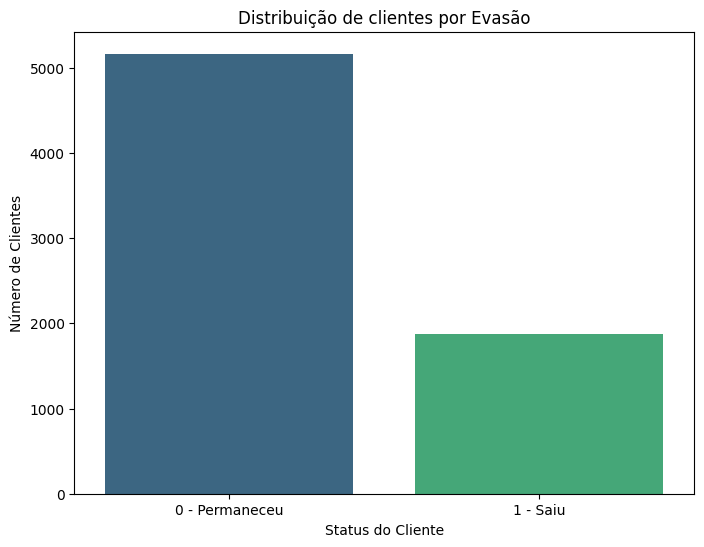

In [24]:
#Visualização da proporção com um gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='evasao', data=df, palette='viridis')
plt.title('Distribuição de clientes por Evasão', fontsize=12)
plt.xlabel('Status do Cliente', fontsize=10)
plt.ylabel('Número de Clientes', fontsize=10)
plt.xticks(ticks=[0, 1], labels=['0 - Permaneceu', '1 - Saiu'])
plt.show()

# **2. Correlação e seleção de variáveis**

## 2.1 Análise de correlação

In [25]:
#resetando index para unir os dataframes
df_encoder = df_encoder.reset_index(drop=True)
y = y.reset_index(drop=True)

In [26]:
#unindo dataframe 'df_encoder' e 'y' para fazer a correlação.
# o dataframe 'df_encoder' possui as colunas pós ONEHOTENCODER
# O dataframe 'y' posui a coluna alvo 'evasao'
df_correlacao = pd.concat([df_encoder, y], axis=1)

In [27]:
# verificando se apareceu algum valor nulo pós junção de dataframes
df_correlacao.isna().sum()

,0
onehotencoder__metodo_pagamento_Bank transfer (automatic),0
onehotencoder__metodo_pagamento_Credit card (automatic),0
onehotencoder__metodo_pagamento_Electronic check,0
onehotencoder__metodo_pagamento_Mailed check,0
onehotencoder__fatura_online_Sim,0
onehotencoder__tipo_contrato_Month-to-month,0
onehotencoder__tipo_contrato_One year,0
onehotencoder__tipo_contrato_Two year,0
onehotencoder__streaming_filmes_No,0
onehotencoder__streaming_filmes_No internet service,0


In [28]:
#exibindo as 5 primeiras linhas do dataframe unido
df_correlacao.head()

,onehotencoder__metodo_pagamento_Bank transfer (automatic),onehotencoder__metodo_pagamento_Credit card (automatic),onehotencoder__metodo_pagamento_Electronic check,onehotencoder__metodo_pagamento_Mailed check,onehotencoder__fatura_online_Sim,onehotencoder__tipo_contrato_Month-to-month,onehotencoder__tipo_contrato_One year,onehotencoder__tipo_contrato_Two year,onehotencoder__streaming_filmes_No,onehotencoder__streaming_filmes_No internet service,...,onehotencoder__cliente_genero_Male,remainder__cliente_mais_65,remainder__cliente_parceiro,remainder__cliente_dependentes,remainder__meses_contrato,remainder__assinatura_servico_telefonico,remainder__conta_mensal,remainder__valor_total_contas,remainder__contas_diarias,evasao
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,9.0,1.0,65.6,593.30,2.19,0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,9.0,1.0,59.9,542.40,2.00,0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,4.0,1.0,73.9,280.85,2.46,1
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,13.0,1.0,98.0,1237.85,3.27,1
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,3.0,1.0,83.9,267.40,2.80,1


In [29]:
corr_matrix=df_correlacao.corr()
corr_matrix['evasao'].sort_values(ascending=False)

,evasao
evasao,1.000000
onehotencoder__tipo_contrato_Month-to-month,0.404565
onehotencoder__servico_seguranca_online_No,0.342235
onehotencoder__suporte_tecnico_internet_No,0.336877
onehotencoder__servico_internet_Fiber optic,0.307463
onehotencoder__metodo_pagamento_Electronic check,0.301455
onehotencoder__servico_beckup_online_No,0.267595
onehotencoder__protecao_dispositivo_No,0.252056
remainder__contas_diarias,0.192914
remainder__conta_mensal,0.192858


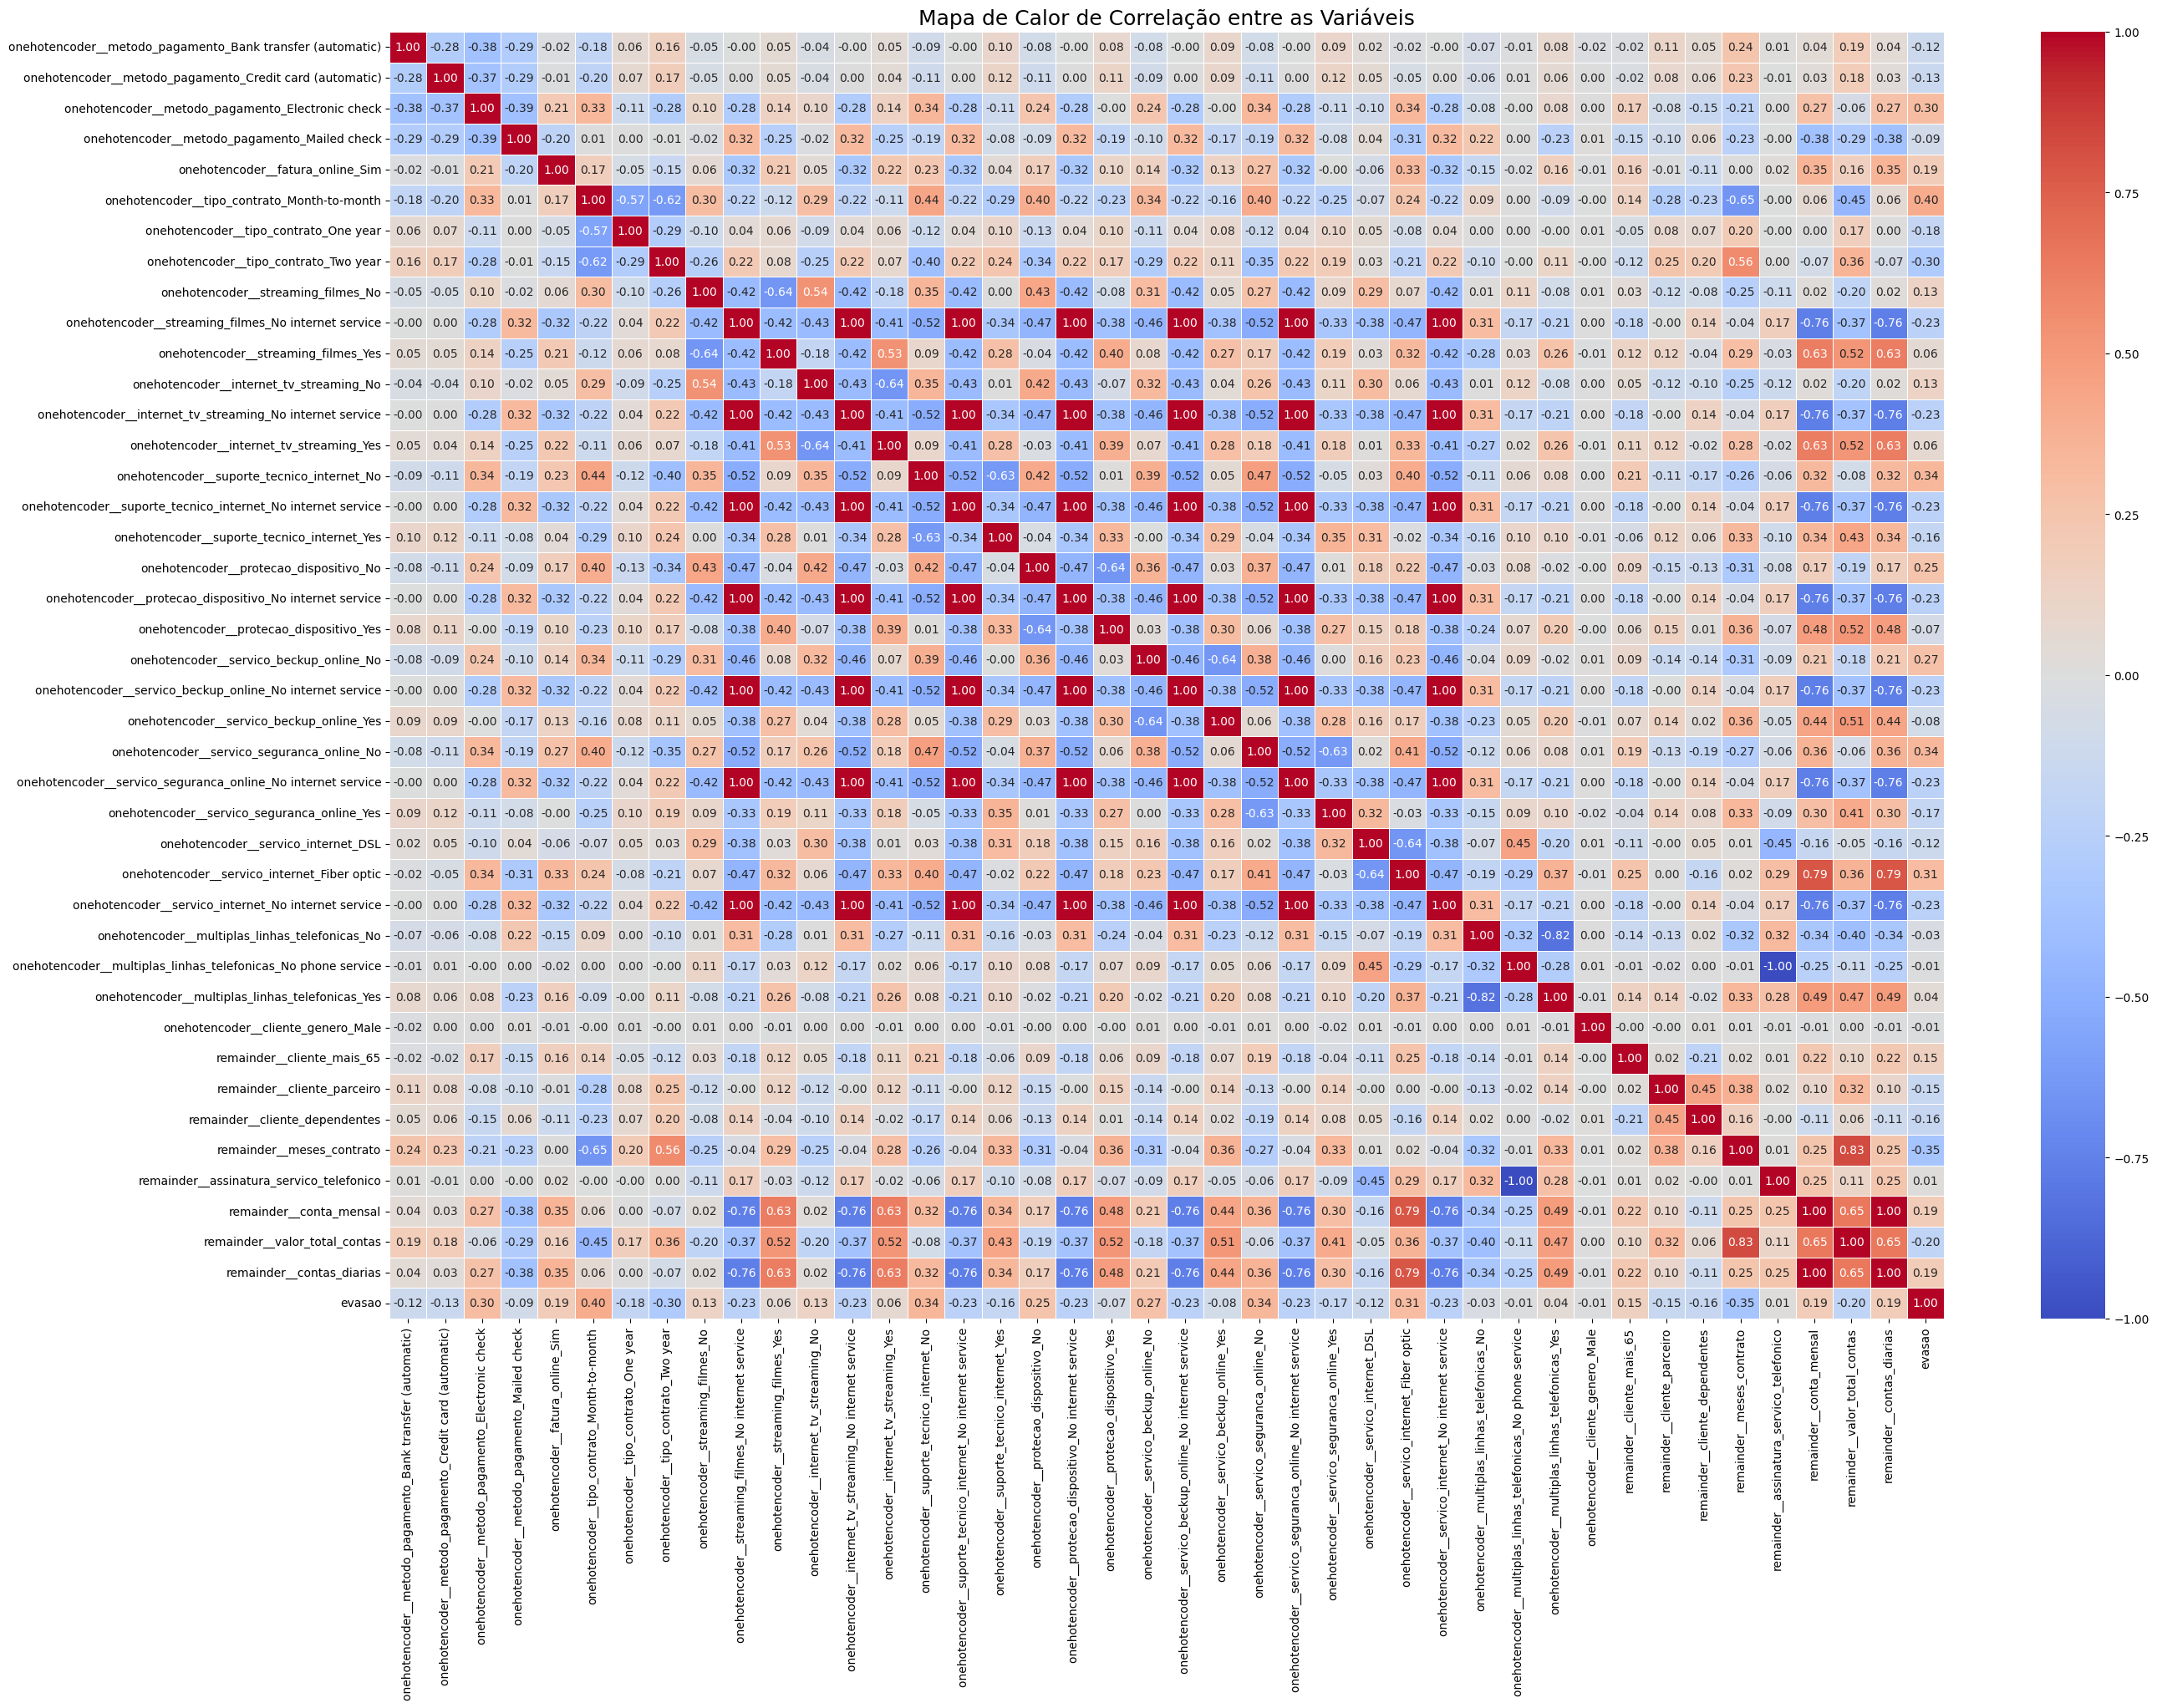

In [30]:
# Criando o mapa de calor (heatmap) para visualizar a matriz
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix,
            annot=True,      # Exibe os valores de correlação no mapa
            cmap='coolwarm', # Esquema de cores (vermelho=positivo, azul=negativo)
            fmt='.2f',       # Formata os números para duas casas decimais
            linewidths=.5)
plt.title('Mapa de Calor de Correlação entre as Variáveis', fontsize=18)
plt.show()

## 2.2 Análises direcionadas

### 2.2.1 Tempo de contrato x evasão

/tmp/ipython-input-3267790820.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='evasao', y='meses_contrato', data=df, palette='viridis')


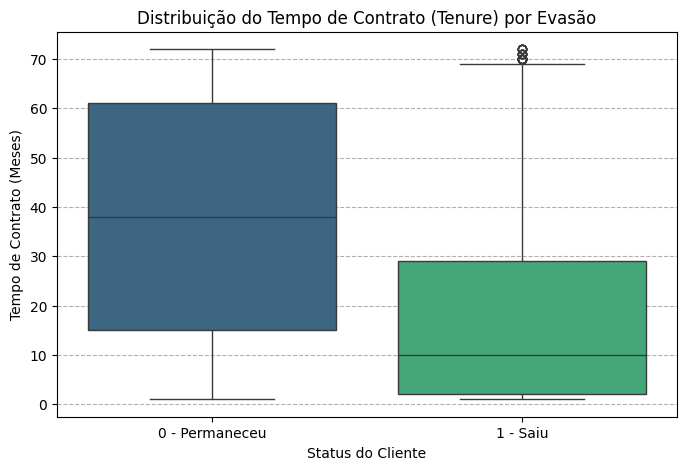

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='evasao', y='meses_contrato', data=df, palette='viridis')
plt.title('Distribuição do Tempo de Contrato (Tenure) por Evasão', fontsize=12)
plt.xlabel('Status do Cliente', fontsize=10)
plt.ylabel('Tempo de Contrato (Meses)', fontsize=10)
plt.xticks(ticks=[0, 1], labels=['0 - Permaneceu', '1 - Saiu'])
plt.grid(axis='y', linestyle='--')
plt.show()

### 2.2.2 Total Gastos x Evasao

/tmp/ipython-input-3164254596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='evasao', y='valor_total_contas', data=df, palette='viridis')


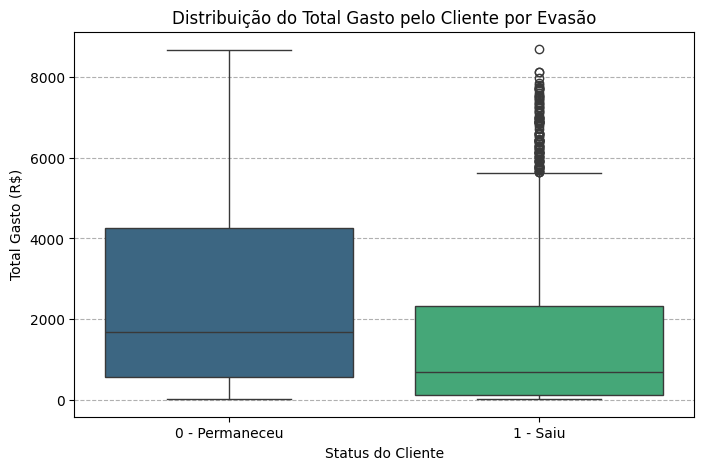

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='evasao', y='valor_total_contas', data=df, palette='viridis')
plt.title('Distribuição do Total Gasto pelo Cliente por Evasão', fontsize=12)
plt.xlabel('Status do Cliente', fontsize=10)
plt.ylabel('Total Gasto (R$)', fontsize=10)
plt.xticks(ticks=[0, 1], labels=['0 - Permaneceu', '1 - Saiu'])
plt.grid(axis='y', linestyle='--')
plt.show()

## 2.3 Normalização ou Padronização

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Usado o df_correlacao
df_para_escalar = df_correlacao.copy()

# --------------------------------------------------------------------------
# PASSO 1: Separação da variável alvo (evasao) das features (preditores)
# --------------------------------------------------------------------------
# A normalização só é aplicada nas features que usarão para prever.
X = df_para_escalar.drop('evasao', axis=1)
y = df_para_escalar['evasao']

print("Shape das features (X) antes de escalar:", X.shape)
print("Shape do alvo (y):", y.shape)

# --------------------------------------------------------------------------
# PASSO 2: Aplicação da normalização
# --------------------------------------------------------------------------
# Criando o objeto scaler
scaler = MinMaxScaler()

# Aplicando a normalização nas features (X)
# O método fit_transform aprende os parâmetros (min/max) e transforma os dados
X_scaled = scaler.fit_transform(X)

# --------------------------------------------------------------------------
# PASSO 3: Reconstrução do DataFrame para manter a organização
# --------------------------------------------------------------------------
# A saída do scaler é um array NumPy, que será convertido de volta para um
# DataFrame para manter os nomes das colunas, facilitando a análise de
# correlação
df_final = pd.DataFrame(X_scaled, columns=X.columns)

Shape das features (X) antes de escalar: (7032, 41)
Shape do alvo (y): (7032,)


# **3 Modelagem Preditiva**

## 3.1 Separação dos dados

In [34]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(
    X,                # Dataframe com todas as colunas selecionadas para a analise
    y,                # Dataframe com a variável alvo
    test_size=0.3,    # Proporção dos dados para o conjunto de teste (30%)
    random_state=10,  # Garante que a divisão seja sempre a mesma ao rodar o código
    stratify=y        # Essencial para manter a proporção de evasao nos dois conjuntos
)

# Verificando as dimensões (shapes) dos conjuntos criados
print("---------------------------------------------------------")
print("Dimensões dos Conjuntos de Dados")
print(f"Shape de X_train (features de treino): {X_train.shape}")
print(f"Shape de X_test (features de teste):  {X_test.shape}")
print(f"Shape de y_train (alvo de treino):     {y_train.shape}")
print(f"Shape de y_test (alvo de teste):      {y_test.shape}")
print("---------------------------------------------------------")

# Verificando a proporção da variável alvo para confirmar a estratificação
print("---------------------------------------------------------")
print("Verificação da Estratificação (Proporção de evasao)")
print("Base para treino (%):")
print(round(y_train.value_counts(normalize=True) * 100, 2))
print("\nBase para teste (%):")
print(round(y_test.value_counts(normalize=True) * 100, 2))
print("---------------------------------------------------------")

---------------------------------------------------------
Dimensões dos Conjuntos de Dados
Shape de X_train (features de treino): (4922, 41)
Shape de X_test (features de teste):  (2110, 41)
Shape de y_train (alvo de treino):     (4922,)
Shape de y_test (alvo de teste):      (2110,)
---------------------------------------------------------
---------------------------------------------------------
Verificação da Estratificação (Proporção de evasao)
Base para treino (%):
evasao
0    73.43
1    26.57
Name: proportion, dtype: float64

Base para teste (%):
evasao
0    73.41
1    26.59
Name: proportion, dtype: float64
---------------------------------------------------------


## 3.2 Criação de modelos

### 3.2.1 Random Forest

### 3.2.1.1 Justificativa:
Apliquei primeiramente a árvore de decisão e percebi que para modelos muito complexos, onde há muitas variáveis, a arvore fica extremamente dificil de compreender e acaba mais atrapalhando do que ajudando. O random forest acabou se saindo melhor e por isso foi o escolhido

### 3.2.1.2 Normalização?
Para esse modelo não há a necessidade de fazer a normalização. Apesar disso, criei 2 modelos, e no segundo, deixei a possibilidade de fazer a normalização apenas para efeitos didáticos, mostrando assim que não há alteração nenhuma no resultado final. Isso prova que realmente para o modelo random forest não há a necessidade de normalização.

3.2.2.1 Random Forest com threshold Padrão

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# 1. Criar o modelo
modelo_padrao = RandomForestClassifier(
    n_estimators=100,      # número de árvores
    max_depth=None,        # profundidade máxima (None = cresce até o fim)
    random_state=42
)

# 2. Treinar
modelo_padrao.fit(X_train, y_train)

# 3. Prever no teste
y_pred_rfp = modelo_padrao.predict(X_test)

# 4. Avaliar
print("Acurácia:", accuracy_score(y_test, y_pred_rfp))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rfp))

#5. Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rfp))

Acurácia: 0.7909952606635071

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.49      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

Matriz de Confusão:
[[1393  156]
 [ 285  276]]


3.2.2.2 Random Forest com SMOTE + Threshold ajustado com foco em sensibilidade (recall) para evasão

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_recall_curve
)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# === PARÂMETROS ===
usar_normalizacao = False  # True se quiser normalizar os dados

# === 1. Normalização opcional ===
if usar_normalizacao:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

# === 2. Treinar modelo com class_weight='balanced' ===
modelo = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
modelo.fit(X_train, y_train)

# === 3. Previsão de probabilidades ===
y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidades da classe 1

# === 4. Ajustar threshold com base no melhor F1 ===
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5

# === 5. Previsão final com novo threshold ===
y_pred_ajustado = (y_prob >= best_threshold).astype(int)

# === 6. Avaliação ===
print(f"Melhor threshold baseado no F1-score: {best_threshold:.3f}")
print("\nRelatório de Classificação (com threshold ajustado):\n")
print(classification_report(y_test, y_pred_ajustado, digits=4))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_ajustado))
print("Acurácia:", accuracy_score(y_test, y_pred_ajustado))


Melhor threshold baseado no F1-score: 0.300

Relatório de Classificação (com threshold ajustado):

              precision    recall  f1-score   support

           0     0.8933    0.7618    0.8223      1549
           1     0.5323    0.7487    0.6222       561

    accuracy                         0.7583      2110
   macro avg     0.7128    0.7552    0.7223      2110
weighted avg     0.7973    0.7583    0.7691      2110

Matriz de Confusão:
 [[1180  369]
 [ 141  420]]
Acurácia: 0.7582938388625592


### 3.2.2 Normalização

In [37]:
#Fazendo a normalização para utilizar o modelo de regressão logística
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.transform(X_test)

### 3.2.3 Regressão Logística

### 3.2.3.1 Justificativa:
Melhor para interpretar resultados e dados lineares.

### 3.2.3.2 Normalização?
Sim, a normalização é importante para que ele funcione corretamente. O modelo é sensivel à escala das variáveis.

Regreção logistica

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Balanceamento com SMOTE (opcional, mas importante em casos de desequilíbrio como o seu)
smote = SMOTE(random_state=42)
x_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Criação e treinamento do modelo de regressão logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(x_train_bal, y_train_bal)

# Predição com os dados de teste
y_pred_rl = logreg.predict(X_test)

# Avaliação do modelo
print("Relatório de classificação:")
print(classification_report(y_test, y_pred_rl))

print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred_rl))

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1549
           1       0.51      0.79      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110

Matriz de confusão:
[[1115  434]
 [ 116  445]]


## 3.3 Avaliação dos modelos

### 3.3.1 Random forest com threshold padrão


--- Resultados do Random Forest com Threshold padrão ---
                precision    recall  f1-score   support

Permaneceu (0)       0.83      0.90      0.86      1549
      Saiu (1)       0.64      0.49      0.56       561

      accuracy                           0.79      2110
     macro avg       0.73      0.70      0.71      2110
  weighted avg       0.78      0.79      0.78      2110



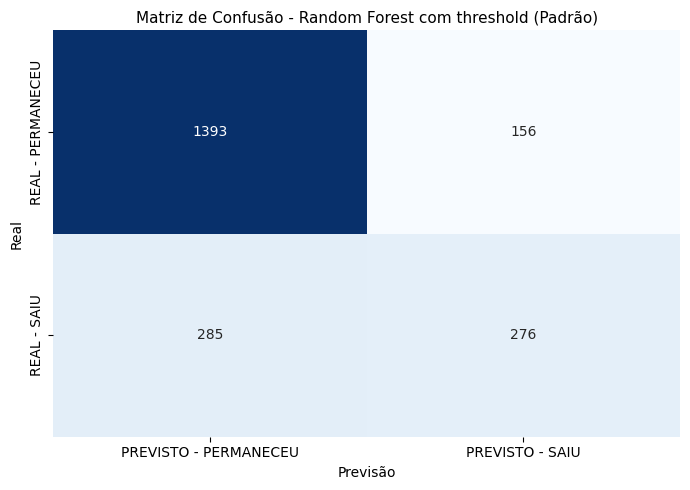

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Re-exibindo o relatório de classificação para referência
print("\n--- Resultados do Random Forest com Threshold padrão ---")
print(classification_report(y_test, y_pred_rfp, target_names=['Permaneceu (0)', 'Saiu (1)']))

# Suponha que y_test e y_pred já estejam definidos com os dados do modelo Random Forest padrão
cm = confusion_matrix(y_test, y_pred_rfp)

# Criar o gráfico
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['PREVISTO - PERMANECEU', 'PREVISTO - SAIU'],
            yticklabels=['REAL - PERMANECEU', 'REAL - SAIU'])

plt.title('Matriz de Confusão - Random Forest com threshold (Padrão)', fontsize = 11)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


### 3.3.2 Random Forest com SMOTE + Threshold ajustado com foco em sensibilidade (recall) para evasão


--- Resultados do Random Forest com SMOTE e Threshold Ajustado ---
                precision    recall  f1-score   support

Permaneceu (0)       0.89      0.76      0.82      1549
      Saiu (1)       0.53      0.75      0.62       561

      accuracy                           0.76      2110
     macro avg       0.71      0.76      0.72      2110
  weighted avg       0.80      0.76      0.77      2110



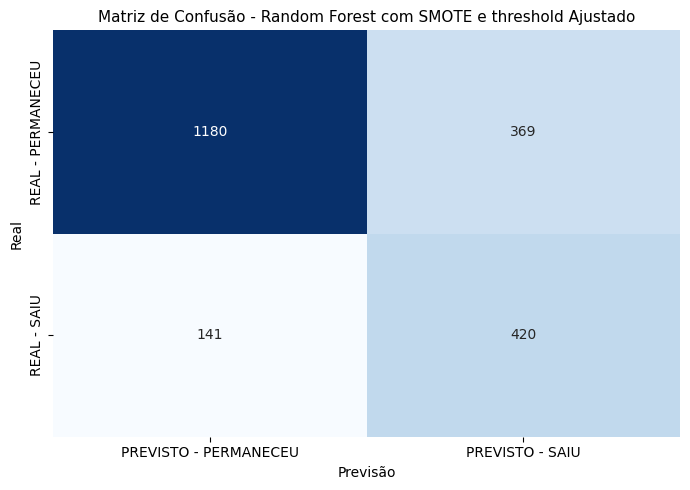

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Re-exibindo o relatório de classificação para referência
print("\n--- Resultados do Random Forest com SMOTE e Threshold Ajustado ---")
print(classification_report(y_test, y_pred_ajustado, target_names=['Permaneceu (0)', 'Saiu (1)']))

# Suponha que y_test e y_pred já estejam definidos com os dados do modelo Random Forest padrão
cm = confusion_matrix(y_test, y_pred_ajustado)

# Criar o gráfico
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['PREVISTO - PERMANECEU', 'PREVISTO - SAIU'],
            yticklabels=['REAL - PERMANECEU', 'REAL - SAIU'])

plt.title('Matriz de Confusão - Random Forest com SMOTE e threshold Ajustado', fontsize = 11)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

### 3.3.3 Regressão Logística


--- Resultados do modelo Regressão Logística ---
                precision    recall  f1-score   support

Permaneceu (0)       0.91      0.72      0.80      1549
      Saiu (1)       0.51      0.79      0.62       561

      accuracy                           0.74      2110
     macro avg       0.71      0.76      0.71      2110
  weighted avg       0.80      0.74      0.75      2110



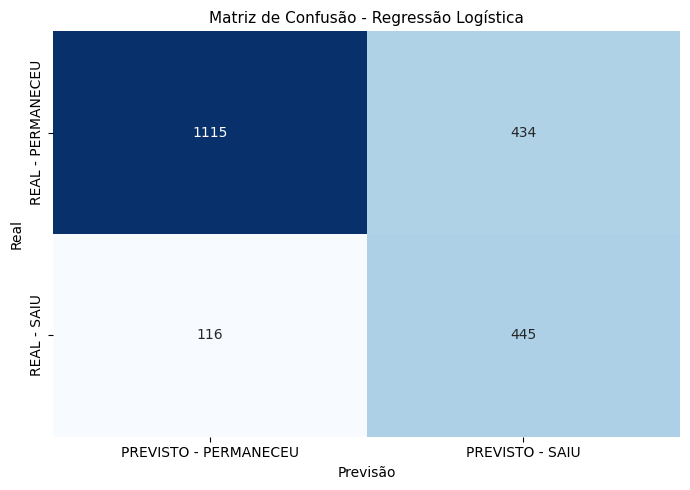

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Re-exibindo o relatório de classificação para referência
print("\n--- Resultados do modelo Regressão Logística ---")
print(classification_report(y_test, y_pred_rl, target_names=['Permaneceu (0)', 'Saiu (1)']))

# Suponha que y_test e y_pred já estejam definidos com os dados do modelo Random Forest padrão
cm = confusion_matrix(y_test, y_pred_rl)

# Criar o gráfico
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['PREVISTO - PERMANECEU', 'PREVISTO - SAIU'],
            yticklabels=['REAL - PERMANECEU', 'REAL - SAIU'])

plt.title('Matriz de Confusão - Regressão Logística', fontsize = 11)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

### 3.3.4 Qual modelo teve melhor desempenho?
--------------------------------------------------------------------------------
Avaliação dos Modelos
--------------------------------------------------------------------------------
1. Regressão Logística

  Acurácia: 0.74

  Precisão (classe 1): 0.51

  Recall (classe 1): 0.79

  F1-score (classe 1): 0.62
--------------------------------------------------------------------------------
2. Random Forest (Threshold Ajustado)

  Acurácia: 0.758

  Precisão (classe 1): 0.532

  Recall (classe 1): 0.749

  F1-score (classe 1): 0.622
--------------------------------------------------------------------------------

3. Random Forest (Threshold Padrão)

  Acurácia: 0.791

  Precisão (classe 1): 0.64

  Recall (classe 1): 0.49

  F1-score (classe 1): 0.56
--------------------------------------------------------------------------------


Análise Crítica e Comparativa


1. Melhor Acurácia:

  Random Forest com threshold padrão (0.791) teve o maior acerto geral.


2. Melhor Precisão (classe 1 - evasão):

  Random Forest com threshold padrão (0.64) foi o mais preciso em prever quem iria evadir. Isso significa menos falsos positivos.


3. Melhor Recall (classe 1 - evasão):

  Regressão Logística (0.79) teve o maior recall, ou seja, foi o melhor em identificar os clientes que realmente evadiram.

4. Melhor F1-Score (classe 1 - evasão):

  Random Forest com threshold ajustado (0.622) teve o melhor equilíbrio entre precisão e recall.

--------------------------------------------------------------------------------
Conclusão: Qual modelo teve o melhor desempenho?

Depende do objetivo:

Se o objetivo é acertar o maior número total de casos (acurácia) → Random Forest padrão é o melhor.

Se o foco é evitar deixar de identificar um cliente que irá evadir (recall) → Regressão Logística é mais eficaz.

Se for necessário equilibrar precisão e recall (F1-score), ou seja, acertar tanto quem fica quanto quem sai com consistência, Random Forest com threshold ajustado é o mais indicado.

Recomendação prática:
Se a empresa sofre muito com evasão e precisa agir sobre todos os casos possíveis, mesmo que com alguns falsos positivos, use o modelo com maior recall ou F1-score:
Random Forest com threshold ajustado.

### 3.3.5 Overfitting ou underfitthing?

In [42]:
# Calculando a acurácia nos dados de treino para ambos os modelos
random_padrao_train = accuracy_score(y_train, modelo_padrao.predict(X_train))
random_ajustado_train = accuracy_score(y_train, modelo.predict(X_train))
regressao_log_train = accuracy_score(y_train, logreg.predict(X_train))


# Calculando a acurácia nos dados de teste
random_padrao_test = accuracy_score(y_test, y_pred_rfp)
random_ajustado_test = accuracy_score(y_test, y_pred_ajustado)
regressao_log_test = accuracy_score(y_test, y_pred_rl)

print("----------- Verificação de Overfitting -----------")
print("-" * 50)
print(f"Acurácia da Regressão Logística (Treino): {regressao_log_train * 100:.2f}%")
print(f"Acurácia da Regressão Logística (Teste):  {regressao_log_test * 100:.2f}%")
print("-" * 50)
print(f"Acurácia do Random Forest Ajustado (Treino): {random_ajustado_train * 100:.2f}%")
print(f"Acurácia do Random Forest Ajustado (Teste):  {random_ajustado_test * 100:.2f}%")
print("-" * 50)
print(f"Acurácia do Random Forest Padrao (Treino): {random_padrao_train * 100:.2f}%")
print(f"Acurácia do Random Forest Padrao (Teste):  {random_padrao_test* 100:.2f}%")

----------- Verificação de Overfitting -----------
--------------------------------------------------
Acurácia da Regressão Logística (Treino): 75.82%
Acurácia da Regressão Logística (Teste):  73.93%
--------------------------------------------------
Acurácia do Random Forest Ajustado (Treino): 99.88%
Acurácia do Random Forest Ajustado (Teste):  75.83%
--------------------------------------------------
Acurácia do Random Forest Padrao (Treino): 99.88%
Acurácia do Random Forest Padrao (Teste):  79.10%


Sim, os modelos Random Forest (ajustado e padrão) estão apresentando overfitting.

Explicação direta:

Treino: ~99.88%, muito alto.

Teste: ~75–79%, bem mais baixo.

Essa diferença grande entre treino e teste indica que os modelos estão se ajustando demais aos dados de treino, perdendo capacidade de generalização.
**************************************************
Já a Regressão Logística mostra uma diferença menor entre treino e teste (~75% vs. ~74%), sugerindo bom balanceamento, sem overfitting evidente.
**************************************************
A solução para balancear os modelos random forest padrao e ajustado seria diminuir a complexidade do modelo ajustando hiperparâmetros como max_depth, n_estimators, min_samples_leaf e max_features. Também use validação cruzada.

# **4 Interpretação e conclusão**

## 4.1 Analise de importância das variáveis

### 4.1.1 Regressão Logística

In [43]:
coeficientes = pd.Series(logreg.coef_[0], index=X_train.columns)
coeficientes.sort_values(ascending=False)

,0
onehotencoder__tipo_contrato_Month-to-month,0.635549
onehotencoder__fatura_online_Sim,0.434243
onehotencoder__metodo_pagamento_Electronic check,0.350270
onehotencoder__servico_internet_Fiber optic,0.337092
onehotencoder__multiplas_linhas_telefonicas_No phone service,0.266006
onehotencoder__servico_seguranca_online_No,0.231708
onehotencoder__suporte_tecnico_internet_No,0.222607
remainder__cliente_mais_65,0.220096
onehotencoder__streaming_filmes_Yes,0.165192
onehotencoder__servico_beckup_online_No,0.095582


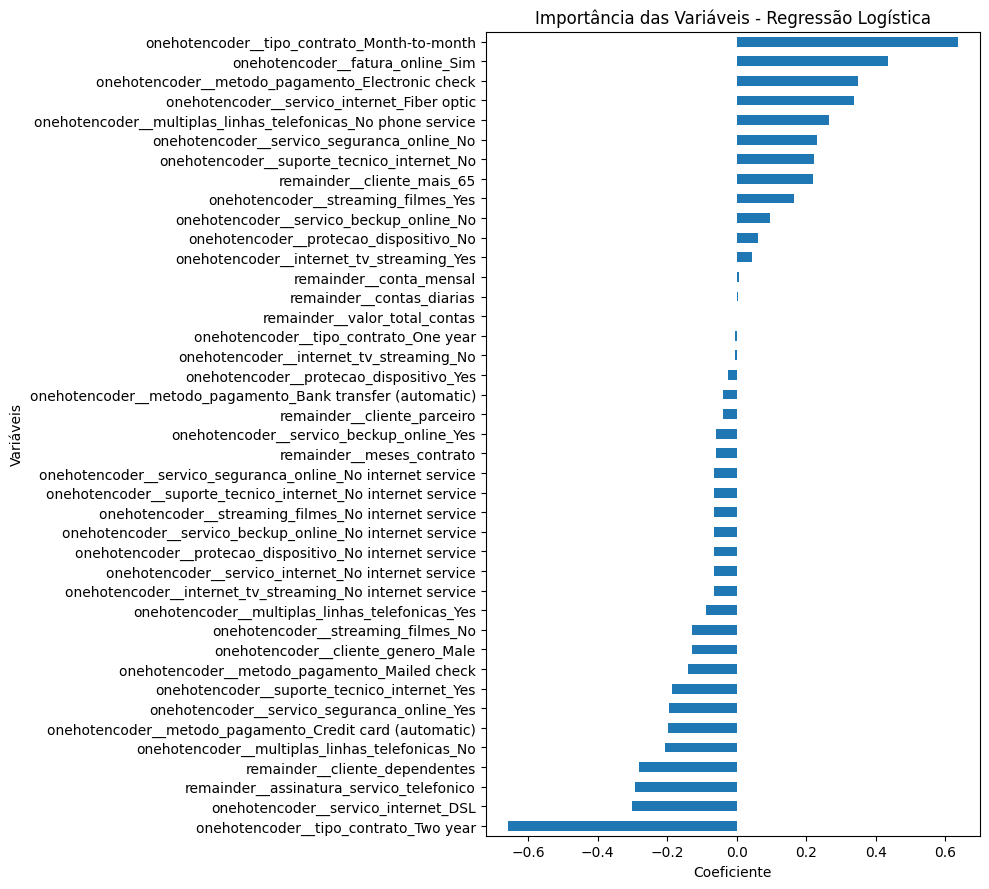

In [44]:
# Coeficientes da Regressão Logística
coef_logreg = pd.Series(logreg.coef_[0], index=X_train.columns)

# Gráfico individual da Regressão Logística
plt.figure(figsize=(10, 9))
coef_logreg.sort_values().plot(kind='barh')
plt.title('Importância das Variáveis - Regressão Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()


### 4.1.2 Random Forest Padrao

In [45]:
import_rf_padrao = pd.Series(modelo_padrao.feature_importances_, index=X_train.columns)
import_rf_padrao.sort_values(ascending=False)


,0
remainder__valor_total_contas,0.152811
remainder__meses_contrato,0.135585
remainder__conta_mensal,0.117874
remainder__contas_diarias,0.100812
onehotencoder__tipo_contrato_Month-to-month,0.050270
onehotencoder__servico_seguranca_online_No,0.031650
onehotencoder__metodo_pagamento_Electronic check,0.031150
onehotencoder__servico_internet_Fiber optic,0.028216
onehotencoder__cliente_genero_Male,0.025833
onehotencoder__suporte_tecnico_internet_No,0.024243


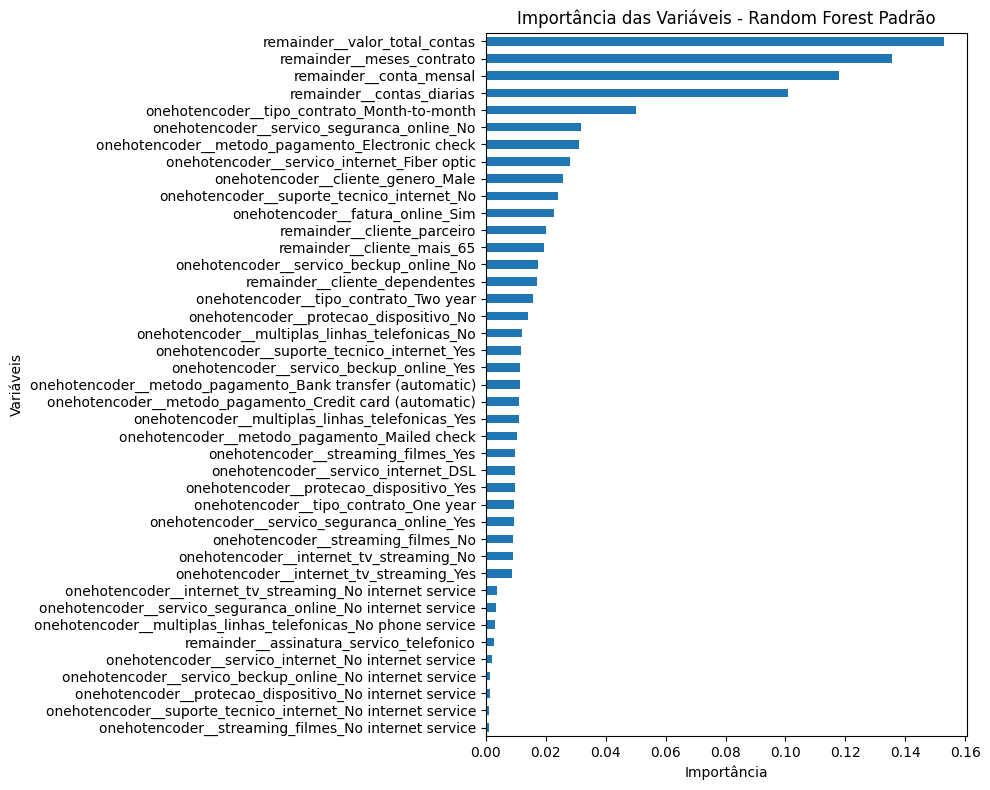

In [46]:
# Importâncias da Random Forest Padrão
import_rf_padrao = pd.Series(modelo_padrao.feature_importances_, index=X_train.columns)

# Gráfico individual
plt.figure(figsize=(10, 8))
import_rf_padrao.sort_values().plot(kind='barh')
plt.title('Importância das Variáveis - Random Forest Padrão')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()


### 4.1.3 Random Forest Ajustado

In [47]:
import_rf_ajustada = pd.Series(modelo.feature_importances_, index=X_train.columns)
import_rf_ajustada.sort_values(ascending=False)


,0
remainder__valor_total_contas,0.134537
remainder__meses_contrato,0.127069
remainder__conta_mensal,0.105789
remainder__contas_diarias,0.094897
onehotencoder__tipo_contrato_Month-to-month,0.067348
onehotencoder__tipo_contrato_Two year,0.037942
onehotencoder__servico_seguranca_online_No,0.036584
onehotencoder__metodo_pagamento_Electronic check,0.029963
onehotencoder__servico_internet_Fiber optic,0.029412
onehotencoder__suporte_tecnico_internet_No,0.027215


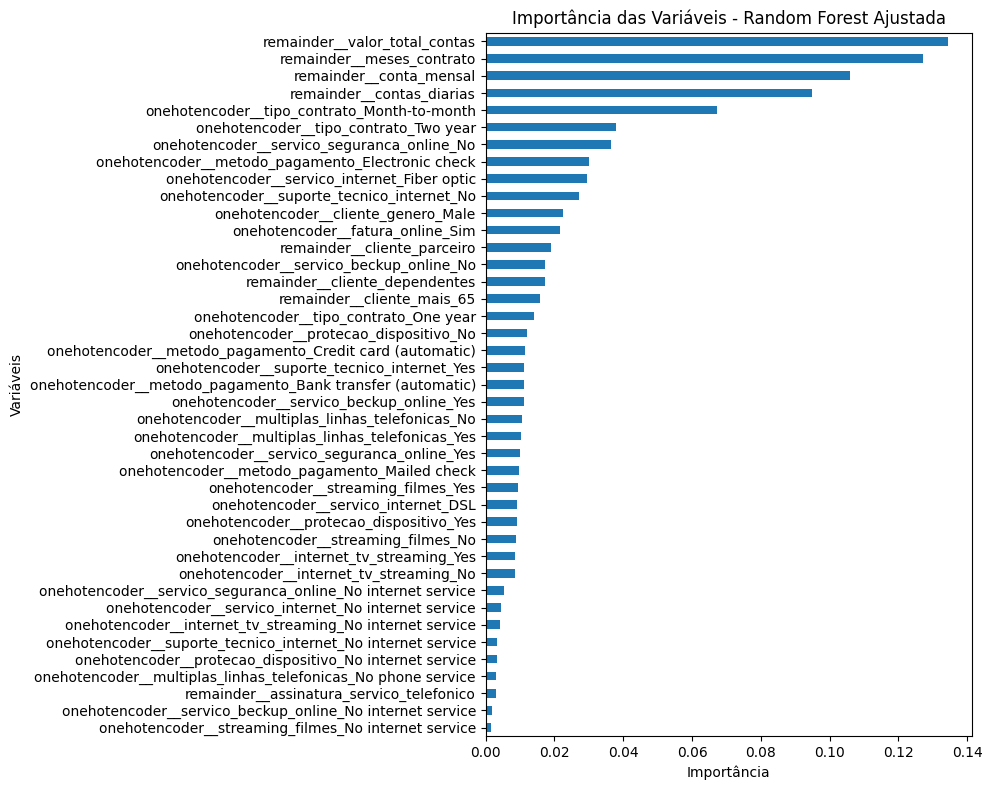

In [48]:
# Importâncias da Random Forest Ajustada
import_rf_ajustada = pd.Series(modelo.feature_importances_, index=X_train.columns)

# Gráfico individual
plt.figure(figsize=(10, 8))
import_rf_ajustada.sort_values().plot(kind='barh')
plt.title('Importância das Variáveis - Random Forest Ajustada')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()


## 4.2 Conclusão

Conclusão: Fatores que Influenciam a Evasão de Clientes
********************************************************************************
Com base na análise realizada no projeto, que incluiu a aplicação de modelos preditivos (Regressão Logística e Random Forest, com threshold padrão e ajustado), identificamos os principais fatores que influenciam a evasão de clientes da empresa. A análise de importância das variáveis, extraída dos coeficientes da Regressão Logística e das importâncias de variáveis dos modelos Random Forest, revelou os seguintes pontos:
********************************************************************************
Principais Fatores de Influência na Evasão:

1. Tempo de Contrato (meses_contrato):
Clientes com menor tempo de contrato apresentam maior probabilidade de evasão. A análise de boxplot mostrou que clientes que evadem tendem a ter contratos mais curtos, sugerindo que a fidelidade aumenta com o tempo de relacionamento com a empresa.



2. Total Gasto (valor_total_contas):
O valor total gasto pelos clientes também se mostrou um fator relevante. Clientes que evadem frequentemente gastam menos ao longo do tempo, o que pode indicar insatisfação com os serviços ou percepção de baixo custo-benefício.



3. Tipo de Contrato (tipo_contrato):
Contratos de curto prazo (por exemplo, mensais) estão fortemente associados à evasão, enquanto contratos de longo prazo (anuais ou bianuais) tendem a reter mais clientes, conforme indicado pelas variáveis codificadas no modelo.



4. Método de Pagamento (metodo_pagamento):
Clientes que utilizam métodos de pagamento menos automatizados, como cheques eletrônicos, apresentam maior propensão à evasão. Métodos automáticos, como cartão de crédito ou débito automático, podem facilitar a retenção.



5. Serviços Adicionais (suporte_tecnico_internet, servico_seguranca_online, etc.):

A ausência de serviços adicionais, como suporte técnico ou segurança online, aumenta a probabilidade de evasão. Isso sugere que clientes que utilizam mais serviços da empresa tendem a permanecer, possivelmente devido a maior integração com o portfólio oferecido.
********************************************************************************
Desempenho dos Modelos:

1. Random Forest com Threshold Ajustado foi o modelo mais equilibrado, com um F1-score de 0.622 para a classe de evasão, indicando um bom balanço entre precisão e recall. Este modelo é recomendado para cenários onde é crucial identificar a maioria dos clientes em risco de evasão, mesmo com alguns falsos positivos.

2. Regressão Logística destacou-se pelo maior recall (0.79), sendo eficaz para identificar clientes que realmente evadem, o que é útil para estratégias preventivas.

3. Random Forest com Threshold Padrão obteve a maior acurácia (0.791), mas com recall mais baixo (0.49), sendo menos eficiente para detectar evasão.
********************************************************************************
Recomendações Estratégicas

Para reduzir a evasão de clientes, a empresa deve considerar:

1. Incentivar Contratos de Longo Prazo: Oferecer descontos ou benefícios para contratos anuais ou bianuais pode aumentar a retenção.

2. Promover Métodos de Pagamento Automatizados: Incentivar o uso de cartão de crédito ou débito automático pode reduzir a fricção no processo de pagamento.

3. Fortalecer Serviços Adicionais: Investir em suporte técnico de qualidade e serviços como segurança online pode aumentar a percepção de valor pelos clientes.

4. Engajar Clientes Recentes: Implementar programas de onboarding para novos clientes, com o objetivo de aumentar o tempo de contrato e a fidelidade.

5. Monitoramento Proativo: Utilizar o modelo Random Forest com threshold ajustado para identificar clientes com alta probabilidade de evasão e direcionar ações personalizadas, como promoções ou contato direto.
********************************************************************************
Considerações Finais

A evasão de clientes é influenciada por uma combinação de fatores contratuais, financeiros e de utilização de serviços. A aplicação de modelos preditivos, como os apresentados, permite identificar os clientes em risco com razoável precisão. A escolha do modelo ideal depende do objetivo estratégico da empresa, mas o Random Forest com threshold ajustado oferece o melhor equilíbrio para ações práticas de retenção. Além disso, a análise de overfitting nos modelos Random Forest sugere a necessidade de ajustes nos hiperparâmetros para melhorar a generalização em futuros desenvolvimentos.